In [24]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import seaborn as sns

FWHM: 1.5143410298625826


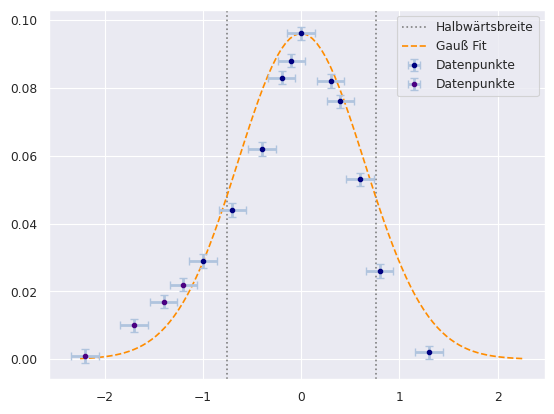

In [85]:
#load data and set errors
df = pd.read_csv('Laser_Bandbreite.csv')
pos = df['Position/cm']
#shift distribution to be around maximum
pos = pos - 2.7
pos_err = 0.14 * np.ones(len(pos))
intens = df['Leistung (Int.)/microW']
intens_err = 0.002 * np.ones(len(intens))

#calculate full width at half maximum intensity
sigma = np.std(pos[0:11])
fwhm = 2 * np.sqrt(2*np.log(2)) * sigma
print('FWHM:', fwhm)

#calcualte wavelength difference (line width) with fwhm
k = 1 #diffraction order
d = 1200 * 10 #diffraction coefficient of the grid in cm
b = 40 #distance between grid and detector in cm which to use !?
lamda = 670 *10^-9 # ideal wavelength of laser 670 nm from datasheet DL-3149-056
beta = np.arcsin(lamda/b) #standard diffraction equation
dbeta = 2 * np.arctan(0.5*fwhm/b)

dlamda = (d/k) * np.cos(beta) * dbeta

#prepare gaussian for comparison
mu = 0 # since pos has been shifted
x = np.linspace(-3.5*sigma, 3.5*sigma, 100)
#scaling the normal distribution to fit the data
scaling =  np.sqrt(2*np.pi)*sigma *intens.max()
y = scaling * stats.norm.pdf(x, mu, sigma)

#plot results
sns.set_theme(style="darkgrid")
sns.set_context("paper")
plt.axvline(x = -fwhm/2, color = 'grey', linestyle = ':', label = 'Halbwärtsbreite')
plt.axvline(x = fwhm/2, color = 'grey', linestyle = ':')
plt.plot(x, y, '--', color = 'darkorange', label = 'Gauß Fit')
plt.errorbar(x=pos[0:11], y=intens[0:11], 
             xerr= pos_err[0:11], yerr= intens_err[0:11], markersize=6,
             fmt=".",color="navy", ecolor="lightsteelblue", elinewidth=2, capsize=3, label="Datenpunkte")
plt.errorbar(x=pos[11:], y=intens[11:], 
             xerr= pos_err[11:], yerr= intens_err[11:], markersize=6,
             fmt=".",color="indigo", ecolor="lightsteelblue", elinewidth=2, capsize=3, label="Datenpunkte")
plt.legend()